# Part II - Loan Data from Prosper
## by Zijin (Ginn) Cheng

## Investigation Overview


> The investigation focuses on how the borrower/interest rate of the Prosper loans is affected by the borrowers status such as personal income and loan status such as montly loan payment.


## Dataset Overview and Executive Summary

> Briefly introduce your dataset here. Include a summary of findings that your visualizations will support.

> This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The definition of the column names can be found in prosper-loan-data-variable-definitions.

> Based on the feature, the investigation will be supported by the following columns:

> * BorrowerRate: The Borrower's interest rate for this loan.
> * ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
> * IncomeRange: The income range of the borrower at the time the listing was created.
> * StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
> * MonthlyLoanPayment: The scheduled monthly loan payment.

> **Rubric Tip**: The key insights can be in a bulleted or numbered list for ease of review.

> The investigation started from the univarible distributions of the borrower rates, and completemeneted further by a set of bivariable and multivariable explorations. Some key findings are summarised as follows,

> * The entire borrowing rate resembles a normal distribution but right-skewed. Most of the loans are documented with a borrowing rate between 15-20%.
> * With a high monthly pay, the borrower rate is somehow limited to a lower value, but when the monthly pay is very low, the borrowers are somehow insensitve to a high interest rate.
> * With an increasing income range level, the highest borrower rate is gradually moving from a high rate (>30%) towards a lower rate (10-20%). It somehow indicates that for all loans in Prosper, borrowers who have a higher income may be in favor of a lower borrower rate.
> * Generally, regardless which category that a loan is in, the most borrower rates alway lie towards 30% if the borrower is in a low income range, but towards 10% if the borrower has a higher income.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dfsl = pd.read_csv('source_data/wrangled_load_data_prosper.csv')
dfsl.head()

,BorrowerRate,ListingCategory,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Category,ScaledBorrowerRate,BorrowerRateRange,MonthlyLoanPaymentRange
0,0.0920,2,"$50,000-74,999",True,6125.000000,318.93,Home Improvement,9.20,"(8.0, 12.0]","(250.222, 500.444]"
1,0.2085,2,"$100,000+",True,9583.333333,563.97,Home Improvement,20.85,"(20.0, 24.0]","(500.444, 750.667]"
2,0.1314,1,"$100,000+",True,8333.333333,342.37,Debt Consolidation,13.14,"(12.0, 16.0]","(250.222, 500.444]"
3,0.2712,1,"$25,000-49,999",True,2083.333333,122.67,Debt Consolidation,27.12,"(24.0, 28.0]","(0.0, 250.222]"
4,0.2019,2,"$25,000-49,999",True,3355.750000,372.60,Home Improvement,20.19,"(20.0, 24.0]","(250.222, 500.444]"


## (Visualization 1) What is the general borrower/interest rate distribution?

> This figure is to reveal how the Prosper issues the loan interest rate across all loan listings, where x axis denotes the borrower/interest rate, and the y axis denotes the proportion of the interest rates across all loan listings.

> From the figure, the entire borrowing rate resembles a normal distribution ranging from below 5% to 40%, but somehow right-skewed. Most of the loans are documented with a borrowing rate between 15-20%.

Text(0.5, 1.0, 'The percentage of the borrower rate across all loans')

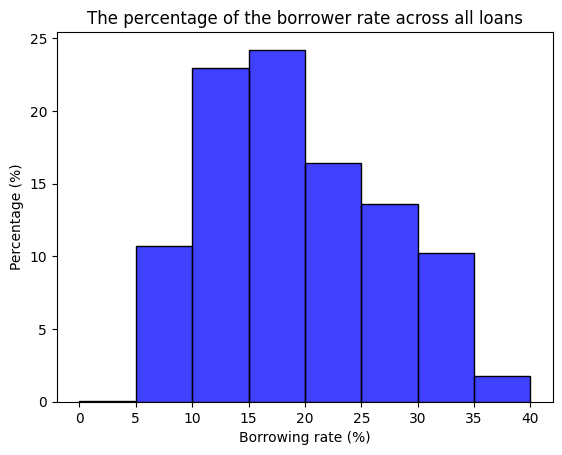

In [3]:
# show the histo of the borrowing rates
# set the bins for the histgrame
bin_sl = np.arange(0,40+5,5)
# plot the figure
ax = sns.histplot(data=dfsl, x='ScaledBorrowerRate', bins=bin_sl, stat='percent', color='blue')
# ax.patches[3].set_facecolor('red')
ax.set_xlabel('Borrowing rate (%)')
ax.set_ylabel('Percentage (%)')
ax.set_title('The percentage of the borrower rate across all loans')

## (Visualization 2) What is the loan proportions as per the borrower rate and monthly loan pay?

> The figure summarises how many loans in percentage of the total with respect to the borrower/interest rate and the corrensponding monthly loan pay. The borrower rates and monthly loan payment range in x and y axis in equal spaces, respectively. The cell values in the heatmap denotes the percentage of the corresponding amount of loans to all Prosper listings. In this way, the question gives an relevant indication on how the interest rate varies with the monthly loan rate quantified by the loan proportion.

> Generally, the interest rate decreases with an increasing monthly loan payment. However, it is noticeable that around 11% of the loans are with a mid monthly pay of $125 but a relatively high borrower rate of 30%. The level is significantly higher than other cells in the heatmap, which may indicate that when the loan payment is relatively low, borrowers are not senstive to the borrower rates.

(0.0, 5.0)

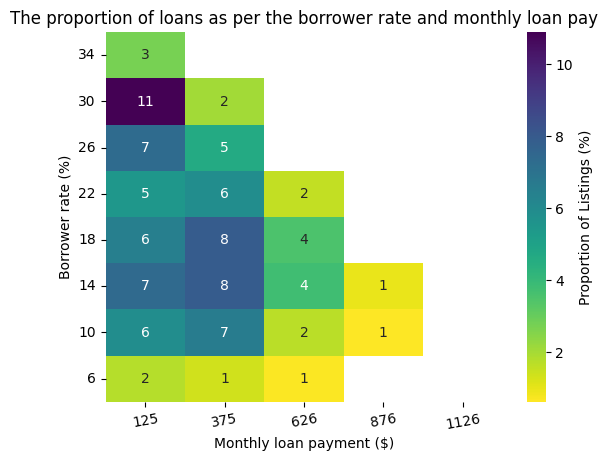

In [4]:
# define bins cut function
def bin_steps(data, num_of_bins):
    ''' The output is a set of equally spaced bins'''
    hist_bins = np.linspace(np.floor(data.min()),np.ceil(data.max()), num_of_bins)
    return hist_bins

# set the bins for a heatmap
x_bins, y_bins = bin_steps(dfsl.ScaledBorrowerRate,10), bin_steps(dfsl.MonthlyLoanPayment,10)
dfsl['BorrowerRateRange'], dfsl['MonthlyLoanPaymentRange'] = pd.cut(dfsl.ScaledBorrowerRate,bins=x_bins), pd.cut(dfsl.MonthlyLoanPayment,bins=y_bins)
# get the mid values of each bins with a proper scaling
hist_x, hist_y = np.round((x_bins[1:]+x_bins[0:-1])/2).astype(int), np.round((y_bins[1:]+y_bins[0:-1])/2).astype(int)
# get the groupby dataframe
dfhtmp = dfsl.groupby(['BorrowerRateRange','MonthlyLoanPaymentRange']).BorrowerRate.count()/dfsl.BorrowerRate.count()*100
dfhtmp = dfhtmp.unstack()

# get the 2d z-values
ax = sns.heatmap(data=dfhtmp.mask(dfhtmp<0.6), cmap='viridis_r', 
                 annot=True, fmt='.0f', cbar_kws={'label':'Proportion of Listings (%)', 'format':'%d'})
ax.set_xticks(ax.get_xticks(),hist_y)
ax.set_yticks(ax.get_yticks(),hist_x)
ax.invert_yaxis()
plt.xticks(rotation=10)
ax.set_xlabel('Monthly loan payment ($)')
ax.set_ylabel('Borrower rate (%)')
ax.set_title('The proportion of loans as per the borrower rate and monthly loan pay')
plt.ylim(1,9)
plt.xlim(0,5)

## (Visualization 3)

> This visualisation shows the borrower/interest rates distribution in histgram in each top loan category (column) and income range (row). The x-axis equally spaces the interest rates of all selected loans and y-axis denotes the corresponding proportion. This visualisation further investigated how the borrower rate varies among each loan category and the borrowers with different incomes. 

> In each column, with an increasing income range level, the highest borrower rate is gradually moving from a high rate (>30%) towards a lower rate (10-20%). It somehow indicates that for all loans in Prosper, borrowers who have a higher income may be in favor of a lower borrower rate.

> Generally, regardless which category that a loan is in, the most borrower rates alway lie towards 30% if the borrower is in a low income range, but towards 10% if the borrower has a higher income.

In [5]:
# check if the income range is in a right order
dfsl.IncomeRange.unique()

array(['$50,000-74,999', '$100,000+', '$25,000-49,999', '$75,000-99,999',
       '$1-24,999'], dtype=object)

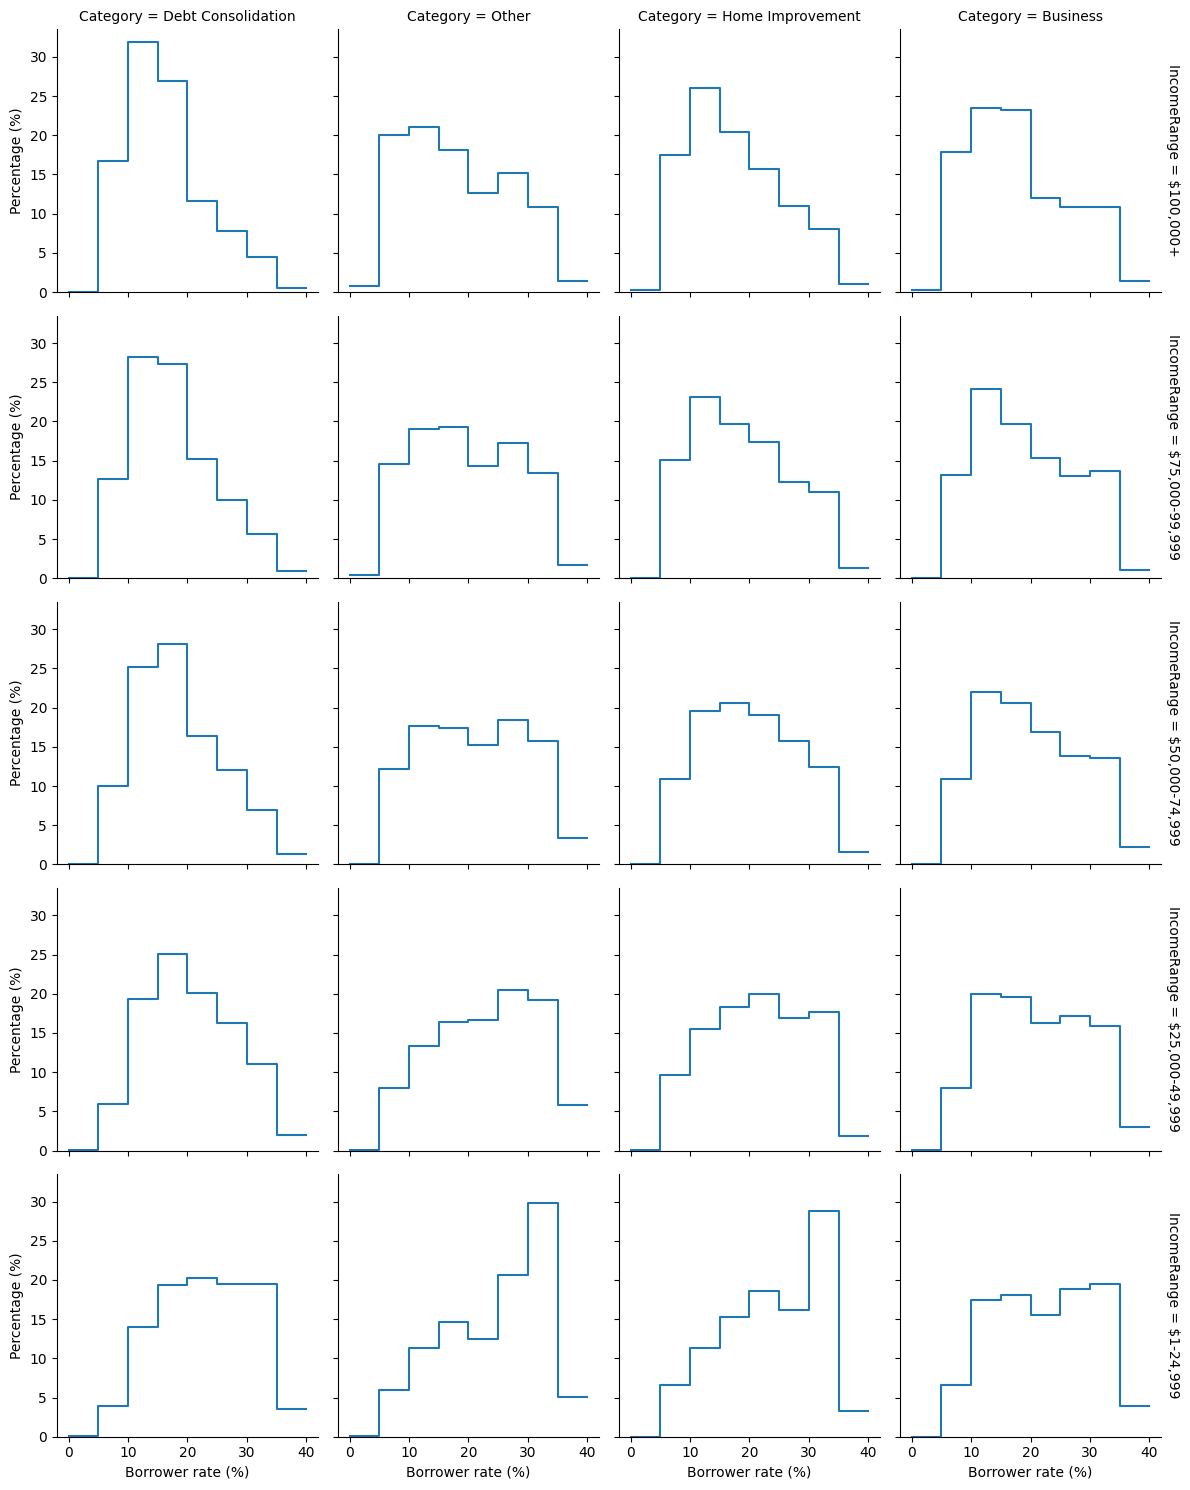

In [6]:
# refine the dfsl according to the top Categories and Income range
row_order = dfsl.IncomeRange.unique()[np.r_[1,3,0,2,4]]
col_order = dfsl.Category.value_counts().keys()
# plot the figure
ax = sns.FacetGrid(data=dfsl, col='Category', col_order=col_order, margin_titles=True,
                   row='IncomeRange', row_order=row_order, palette='blue')
ax.map(sns.histplot, 'ScaledBorrowerRate', bins=bin_sl, stat='percent',
       element='step', kde=False, fill=False)
ax.set_xlabels('Borrower rate (%)')
ax.set_ylabels('Percentage (%)')

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
